[김태영-케라스-학습과정 표시하기](https://tykimos.github.io/2017/07/09/Training_Monitoring/)<br>
아래 내용은 상기 링크를 정리한것.

# Training Monitoring

케라스로 딥러닝 모델을 개발할때,<br> 
가장많이 보게 되는것은 fit함수가 화면에 찍어주는 로그이다.<br>
이 로그에 포함된 수치들은 학습이 제대로 되고 있는 지,<br> 
학습을 그만할지 등을 판단하는 중요한 척도가 된다.<br>
수치 자체도 큰 의미가 있지만 수치들이 epochs마다 바뀌는 변화 추이를 보는 것이 중요하기 때문에,<br>
그래프로 표시하여 보는 것이 더 직관적이다.<br>
본 절에서는 케라스에서 제공하는 기능을 이용하는 방법,<br>
텐서보드와 연동하여 보는 방법,<br>
콜백함수를 직접 만들어서 사용하는 방법에 대해서 알아본다.<br>
* 히스토리 기능 사용하기
* 텐서보드와 연동하기
* 직접 콜백함수 만들어보기

## 히스토리 기능 사용하기
케라스에서 학습시킬 때 fit 함수를 사용한다.<br>
이 함수의 반환 값으로 히스토리 객체를 얻을 수 있는데,<br>
이 객체는 다음의 정보를 담고 있다.<br>
* 매 epochs 마다의 훈련 손실값(loss)
* 매 epochs 마다의 훈련 정확도(acc)
* 매 epochs 마다의 검증 손실값(val_loss)
* 매 epochs 마다의 검증 정확도(val_acc)
<br>

<br>
히스토리 기능은 케라스의 모든 모델에 탑제되어 있으므로 다른 설정없이 fit 함수의 반환으로 쉽게 확인가능.<br>
사용법은 다음과 같다

In [ ]:
hist = model.fit(X_train, Y_train, epochs=1000, batch_size=10, validation_data=(X_val_, Y_val))

print(hist.history['lose'])
print(hist.history['acc'])
print(hist.history['val_loss'])
print(hist.history['val_acc'])

수치들은 각 epochs마다 해당 값이 추가되므로 배열 형태로 저장 되어 있음.<br>
이러한 수치들은 매 epochs마다 변화되는 추이를 그래프로 표시하여 비교하면서 보면 학습 상태를 직관적으로 관찰할 수 있다.<br>
아래 코드와 같이 matplotlib패키지를 이용하면 하나의 그래프로 쉽게 표시가 가능<br>
* train_loss(노란색): 훈련손실 값이며, x축은 epochs 수, 좌측 y축은 손실값을 나타낸다.
* val_loss(빨간색): 검증 손실값이며, x축은 epochs 수, 좌측 y축은 손실값을 나타낸다. 
* tarin_acc(파란색): 훈련 정화도이며, x축은 epochs 수, 우측 y축은 정확도를 나타낸다.
* val_acc(녹색): 검증 정확도이며, x축은 epochs 수, 우측 y축은 정확도를 나타낸다.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx() #??

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', lable='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
loss_ax.legend(loc='lower left')

plt.show()

손글씨 data set인 MNIST를 다층 퍼셉트론 모델로 학습시키는 간단한 예제로 테스트를 진행.

In [10]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

In [15]:
np.random.seed(3)

# 1. 데이터셋 준비하기

# 훈련셋과 시험 셋로딩
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [16]:
# 훈련셋과 검증셋 분리
X_val = X_train[50000:]
X_train = X_train[:50000]

Y_val = Y_train[50000:]
Y_train = Y_train[:50000]

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

In [17]:
# 훈련셋, 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]

X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

In [18]:
# 라벨링 전환
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

In [19]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units = 2, input_dim = 28*28, activation = 'relu'))
model.add(Dense(units = 10, activation='softmax'))

In [20]:
# 3. 모델 엮기 # optimizer: Neural Network를 구성하는 알고리즘을 최적화 시켜주는 도구
model.compile(loss = 'categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [21]:
# 4. 모델 학습시키기
hist = model.fit(X_train, Y_train, epochs = 1000, batch_size=10, validation_data=(X_val, Y_val))

Train on 700 samples, validate on 300 samples
Epoch 1/1000
700/700 [==============================] - 8s 12ms/step - loss: 2.2576 - acc: 0.1643 - val_loss: 2.2272 - val_acc: 0.1633
Epoch 2/1000
700/700 [==============================] - 0s 460us/step - loss: 2.2072 - acc: 0.1657 - val_loss: 2.1908 - val_acc: 0.1800
Epoch 3/1000
700/700 [==============================] - 0s 455us/step - loss: 2.1729 - acc: 0.1729 - val_loss: 2.1630 - val_acc: 0.1867
Epoch 4/1000
700/700 [==============================] - 0s 459us/step - loss: 2.1441 - acc: 0.1786 - val_loss: 2.1371 - val_acc: 0.1867
Epoch 5/1000
700/700 [==============================] - 0s 460us/step - loss: 2.1176 - acc: 0.1900 - val_loss: 2.1140 - val_acc: 0.1867
Epoch 6/1000
700/700 [==============================] - 0s 431us/step - loss: 2.0939 - acc: 0.2029 - val_loss: 2.0931 - val_acc: 0.2033
Epoch 7/1000
700/700 [==============================] - 0s 430us/step - loss: 2.0719 - acc: 0.2086 - val_loss: 2.0726 - val_acc: 0.2067
Epo

Epoch 120/1000
700/700 [==============================] - 0s 429us/step - loss: 1.6646 - acc: 0.3229 - val_loss: 1.8256 - val_acc: 0.2133
Epoch 121/1000
700/700 [==============================] - 0s 415us/step - loss: 1.6632 - acc: 0.3157 - val_loss: 1.8162 - val_acc: 0.2233
Epoch 122/1000
700/700 [==============================] - 0s 404us/step - loss: 1.6621 - acc: 0.3214 - val_loss: 1.8209 - val_acc: 0.2233
Epoch 123/1000
700/700 [==============================] - 0s 444us/step - loss: 1.6613 - acc: 0.3186 - val_loss: 1.8172 - val_acc: 0.2233
Epoch 124/1000
700/700 [==============================] - 0s 438us/step - loss: 1.6600 - acc: 0.3157 - val_loss: 1.8252 - val_acc: 0.2367
Epoch 125/1000
700/700 [==============================] - 0s 447us/step - loss: 1.6589 - acc: 0.3186 - val_loss: 1.8298 - val_acc: 0.2367
Epoch 126/1000
700/700 [==============================] - 0s 421us/step - loss: 1.6571 - acc: 0.3186 - val_loss: 1.8256 - val_acc: 0.2267
Epoch 127/1000
700/700 [==========

700/700 [==============================] - 0s 448us/step - loss: 1.5771 - acc: 0.3443 - val_loss: 1.8683 - val_acc: 0.2133
Epoch 239/1000
700/700 [==============================] - 0s 395us/step - loss: 1.5767 - acc: 0.3529 - val_loss: 1.8750 - val_acc: 0.2300
Epoch 240/1000
700/700 [==============================] - 0s 426us/step - loss: 1.5747 - acc: 0.3543 - val_loss: 1.8793 - val_acc: 0.2467
Epoch 241/1000
700/700 [==============================] - 0s 437us/step - loss: 1.5744 - acc: 0.3571 - val_loss: 1.8771 - val_acc: 0.2433
Epoch 242/1000
700/700 [==============================] - 0s 433us/step - loss: 1.5740 - acc: 0.3571 - val_loss: 1.8788 - val_acc: 0.2133
Epoch 243/1000
700/700 [==============================] - 0s 437us/step - loss: 1.5739 - acc: 0.3600 - val_loss: 1.8853 - val_acc: 0.2167
Epoch 244/1000
700/700 [==============================] - 0s 454us/step - loss: 1.5708 - acc: 0.3571 - val_loss: 1.8767 - val_acc: 0.2200
Epoch 245/1000
700/700 [=========================

700/700 [==============================] - 0s 421us/step - loss: 1.5258 - acc: 0.3700 - val_loss: 1.9544 - val_acc: 0.2433
Epoch 357/1000
700/700 [==============================] - 0s 422us/step - loss: 1.5257 - acc: 0.3729 - val_loss: 1.9475 - val_acc: 0.2267
Epoch 358/1000
700/700 [==============================] - 0s 425us/step - loss: 1.5250 - acc: 0.3700 - val_loss: 1.9614 - val_acc: 0.2233
Epoch 359/1000
700/700 [==============================] - 0s 431us/step - loss: 1.5251 - acc: 0.3757 - val_loss: 1.9557 - val_acc: 0.2200
Epoch 360/1000
700/700 [==============================] - 0s 418us/step - loss: 1.5231 - acc: 0.3729 - val_loss: 1.9573 - val_acc: 0.2267
Epoch 361/1000
700/700 [==============================] - 0s 422us/step - loss: 1.5230 - acc: 0.3729 - val_loss: 1.9567 - val_acc: 0.2300
Epoch 362/1000
700/700 [==============================] - 0s 449us/step - loss: 1.5240 - acc: 0.3671 - val_loss: 1.9587 - val_acc: 0.2233
Epoch 363/1000
700/700 [=========================

700/700 [==============================] - 0s 433us/step - loss: 1.4860 - acc: 0.3871 - val_loss: 1.9997 - val_acc: 0.2300
Epoch 475/1000
700/700 [==============================] - 0s 425us/step - loss: 1.4865 - acc: 0.3900 - val_loss: 2.0056 - val_acc: 0.2200
Epoch 476/1000
700/700 [==============================] - 0s 437us/step - loss: 1.4855 - acc: 0.3871 - val_loss: 2.0063 - val_acc: 0.2267
Epoch 477/1000
700/700 [==============================] - 0s 419us/step - loss: 1.4863 - acc: 0.3900 - val_loss: 2.0087 - val_acc: 0.2200
Epoch 478/1000
700/700 [==============================] - 0s 433us/step - loss: 1.4859 - acc: 0.3929 - val_loss: 2.0079 - val_acc: 0.2300
Epoch 479/1000
700/700 [==============================] - 0s 449us/step - loss: 1.4856 - acc: 0.3871 - val_loss: 2.0000 - val_acc: 0.2267
Epoch 480/1000
700/700 [==============================] - 0s 398us/step - loss: 1.4849 - acc: 0.3929 - val_loss: 2.0110 - val_acc: 0.2400
Epoch 481/1000
700/700 [=========================

700/700 [==============================] - 0s 463us/step - loss: 1.4587 - acc: 0.4014 - val_loss: 2.0542 - val_acc: 0.2333
Epoch 593/1000
700/700 [==============================] - 0s 429us/step - loss: 1.4588 - acc: 0.3971 - val_loss: 2.0458 - val_acc: 0.2267
Epoch 594/1000
700/700 [==============================] - 0s 422us/step - loss: 1.4583 - acc: 0.4129 - val_loss: 2.0465 - val_acc: 0.2333
Epoch 595/1000
700/700 [==============================] - 0s 446us/step - loss: 1.4582 - acc: 0.4000 - val_loss: 2.0511 - val_acc: 0.2367
Epoch 596/1000
700/700 [==============================] - 0s 403us/step - loss: 1.4580 - acc: 0.3986 - val_loss: 2.0422 - val_acc: 0.2300
Epoch 597/1000
700/700 [==============================] - 0s 454us/step - loss: 1.4569 - acc: 0.4043 - val_loss: 2.0460 - val_acc: 0.2500
Epoch 598/1000
700/700 [==============================] - 0s 440us/step - loss: 1.4579 - acc: 0.4000 - val_loss: 2.0490 - val_acc: 0.2267
Epoch 599/1000
700/700 [=========================

700/700 [==============================] - 0s 454us/step - loss: 1.4366 - acc: 0.4157 - val_loss: 2.0874 - val_acc: 0.2433
Epoch 711/1000
700/700 [==============================] - 0s 455us/step - loss: 1.4353 - acc: 0.4129 - val_loss: 2.0898 - val_acc: 0.2367
Epoch 712/1000
700/700 [==============================] - 0s 436us/step - loss: 1.4351 - acc: 0.4129 - val_loss: 2.0949 - val_acc: 0.2567
Epoch 713/1000
700/700 [==============================] - 0s 417us/step - loss: 1.4361 - acc: 0.4129 - val_loss: 2.0799 - val_acc: 0.2367
Epoch 714/1000
700/700 [==============================] - 0s 434us/step - loss: 1.4355 - acc: 0.4157 - val_loss: 2.0892 - val_acc: 0.2367
Epoch 715/1000
700/700 [==============================] - 0s 444us/step - loss: 1.4332 - acc: 0.4171 - val_loss: 2.0875 - val_acc: 0.2567
Epoch 716/1000
700/700 [==============================] - 0s 424us/step - loss: 1.4359 - acc: 0.4100 - val_loss: 2.0963 - val_acc: 0.2433
Epoch 717/1000
700/700 [=========================

700/700 [==============================] - 0s 447us/step - loss: 1.4164 - acc: 0.4343 - val_loss: 2.1295 - val_acc: 0.2400
Epoch 829/1000
700/700 [==============================] - 0s 435us/step - loss: 1.4155 - acc: 0.4271 - val_loss: 2.1361 - val_acc: 0.2433
Epoch 830/1000
700/700 [==============================] - 0s 441us/step - loss: 1.4151 - acc: 0.4300 - val_loss: 2.1388 - val_acc: 0.2433
Epoch 831/1000
700/700 [==============================] - 0s 449us/step - loss: 1.4150 - acc: 0.4371 - val_loss: 2.1495 - val_acc: 0.2433
Epoch 832/1000
700/700 [==============================] - 0s 426us/step - loss: 1.4158 - acc: 0.4314 - val_loss: 2.1531 - val_acc: 0.2400
Epoch 833/1000
700/700 [==============================] - 0s 450us/step - loss: 1.4155 - acc: 0.4271 - val_loss: 2.1584 - val_acc: 0.2367
Epoch 834/1000
700/700 [==============================] - 0s 394us/step - loss: 1.4155 - acc: 0.4257 - val_loss: 2.1656 - val_acc: 0.2467
Epoch 835/1000
700/700 [=========================

700/700 [==============================] - 0s 433us/step - loss: 1.3993 - acc: 0.4329 - val_loss: 2.1757 - val_acc: 0.2533
Epoch 947/1000
700/700 [==============================] - 0s 446us/step - loss: 1.3985 - acc: 0.4329 - val_loss: 2.1978 - val_acc: 0.2600
Epoch 948/1000
700/700 [==============================] - 0s 422us/step - loss: 1.3987 - acc: 0.4243 - val_loss: 2.1670 - val_acc: 0.2400
Epoch 949/1000
700/700 [==============================] - 0s 443us/step - loss: 1.3987 - acc: 0.4414 - val_loss: 2.1689 - val_acc: 0.2433
Epoch 950/1000
700/700 [==============================] - 0s 416us/step - loss: 1.3974 - acc: 0.4386 - val_loss: 2.1744 - val_acc: 0.2433
Epoch 951/1000
700/700 [==============================] - 0s 430us/step - loss: 1.3985 - acc: 0.4343 - val_loss: 2.1860 - val_acc: 0.2533
Epoch 952/1000
700/700 [==============================] - 0s 421us/step - loss: 1.3984 - acc: 0.4371 - val_loss: 2.1846 - val_acc: 0.2467
Epoch 953/1000
700/700 [=========================

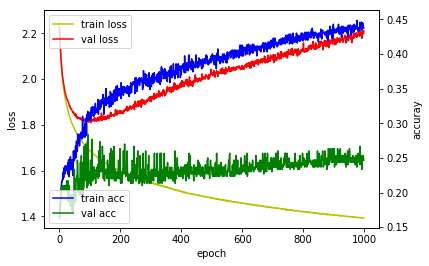

In [27]:
# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

각 epoch에 대한 손실값, 정확도 추이를 볼 수 있다.<br>
검증셋의 손실값이 감소하다가 100 번째 epoch에서 다시 증가 되는 양상을 보인다.<br>
Overfitting(과적합)이 발생했다고 볼 수 있다.<br>
이 경우 100번재 epoch만 학습시킨 모델이 1000번째 epoch까지 학습한 모델보다 실데 테스트에서 더 좋은 결과가 나올 수 있다.<br>

## 텐서보드와 연동하기

텐서플로우에서는 텐서보드라는 훌륭한 학습과정 모니터링 툴을 제공하고 있다.<br>
텐서플로우 기반으로 케라스를 구동하는 경우 이 텐서보드를 사용할 수 있다.<br>
따라서 텐서보드를 이용하기 위해서는 먼저 백엔드를 케라스 설정 파일(keras.json)에서 텐서플로우로 지정해야 한다. 단 경로는 설치 환경에 따라 차이가 날 수 있다.<br>

```
vim ~/.keras/keras.json
```
keras.json 파일을 열어서 다음과 같이 수정.<br> 
**윈도우에서는 keras.json파일이 생성되있음 2018년 4월 기준**
```
{
    "image_data_format": "channels_last",
    "epsilon": 1e-07,
    "floatx": "float32",
    "backend": "tensorflow"
}
```
여기서 중요한 인자는 backend이다. 이 항목이 **tensorflow** 로 지정되어 있어야 한다.<br>
연동하는 방법은 간단하다.<br>
TensorBorad라는 콜백함수를 생성한뒤 fit함수 인자로 넣어주기만 하면된다.<br>
TensorBoard 콜백함수 생성 시 log_dir인자에 경로를 넣어야 하는데, 이 경로에서 텐서보드와 정보를 주고 받을 수 있는 파일이 생성된다.

In [ ]:
tb_his = keras.callbacks.TensorBoard(log_dir='./graph', histogram_freq=0, write_graph=True, write_images=True)
model.fit(X_train, Y_train, epochs=1000, batch_size=10, validation_data=(X_val, Y_val), callbacks=[to_hist])

동일한 예제로 이번에는 텐서보드를 통해 학습 과정을 모니터링 한다.<br>

In [1]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import keras
import numpy as np

C:\Users\admin\AppData\Local\conda\conda\envs\py36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [9]:
np.random.seed(3)

In [10]:
# 1. 데이터셋 준비하기

# 훈련셋과 시험셋 로딩
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]

X_train = X_train[:50000]
Y_train = Y_train[:50000]

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

In [11]:
# 훈련셋, 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

In [13]:
# 라벨링 전
print(Y_train)

[1 6 3 4 8 2 8 6 1 5 3 2 9 2 9 6 0 4 6 4 9 9 1 9 8 1 9 0 1 5 1 9 6 7 7 6 7
 9 5 4 6 1 0 0 8 3 2 6 0 4 5 1 4 1 6 8 2 9 7 5 0 4 2 4 1 6 9 9 2 9 5 9 1 0
 1 0 8 4 4 0 5 6 9 5 9 8 4 9 3 8 2 6 0 6 8 8 0 4 9 4 0 2 1 7 7 4 7 9 6 1 8
 5 9 8 7 7 5 4 6 3 7 5 7 1 4 6 7 8 1 0 8 0 8 5 1 8 7 7 0 6 0 3 4 4 8 1 2 7
 5 9 7 2 3 1 2 3 1 3 1 1 0 7 0 3 6 8 1 5 9 0 4 1 9 7 6 9 4 5 6 3 4 0 4 0 5
 7 8 9 5 2 6 6 9 9 7 0 7 9 1 9 1 1 4 0 5 6 6 6 1 5 2 2 0 3 9 8 2 9 9 6 3 0
 2 4 9 4 3 6 0 4 1 1 8 0 8 1 6 1 8 9 9 0 7 2 3 7 2 7 3 8 8 2 1 4 1 4 4 1 8
 0 3 5 8 2 6 4 0 5 9 2 2 5 7 6 4 4 3 5 4 4 0 8 2 1 3 2 8 7 3 7 9 4 3 4 0 0
 1 2 8 6 1 6 2 2 2 4 2 1 8 3 7 4 2 0 4 2 2 7 5 0 5 3 6 8 0 1 9 5 5 6 2 1 5
 9 7 5 3 6 0 4 3 0 1 6 9 8 5 8 4 3 6 3 8 0 2 5 7 7 7 9 8 9 0 3 5 9 6 2 2 1
 2 6 9 3 5 7 6 0 1 3 4 0 5 4 3 6 5 7 3 4 0 9 2 9 2 2 9 2 5 5 6 7 6 5 7 7 4
 5 2 5 8 7 1 2 1 3 0 5 5 8 0 6 3 9 1 0 5 6 7 3 5 1 5 5 7 2 4 0 7 0 4 1 3 4
 1 3 6 0 2 8 6 5 5 8 3 2 0 6 1 8 9 4 8 5 4 0 4 1 3 9 6 0 8 7 7 1 0 6 0 1 7
 7 2 2 8 0 5 5 7 1 0 7 0 

In [14]:
# 라벨링 전환
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

In [15]:
# 라벨링 후
# one hot encoding으로 변환시킴
print(Y_train)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


In [17]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [1]:
28*28

784

In [21]:
# 3. 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [27]:
# 4. 모델 학습시키기
tb_hist = keras.callbacks.TensorBoard(log_dir='./graph', histogram_freq=0, write_graph=True, write_images=True)
model.fit(X_train, Y_train, epochs=1000, batch_size=10, validation_data=(X_val, Y_val), callbacks=[tb_hist])

Train on 700 samples, validate on 300 samples
Epoch 1/1000
700/700 [==============================] - 1s 2ms/step - loss: 2.2824 - acc: 0.0757 - val_loss: 2.2684 - val_acc: 0.0900
Epoch 2/1000
700/700 [==============================] - 0s 462us/step - loss: 2.2545 - acc: 0.1143 - val_loss: 2.2425 - val_acc: 0.0833
Epoch 3/1000
700/700 [==============================] - 0s 549us/step - loss: 2.2306 - acc: 0.1229 - val_loss: 2.2165 - val_acc: 0.2000
Epoch 4/1000
700/700 [==============================] - 0s 522us/step - loss: 2.2049 - acc: 0.1686 - val_loss: 2.1875 - val_acc: 0.2167
Epoch 5/1000
700/700 [==============================] - 0s 546us/step - loss: 2.1742 - acc: 0.1843 - val_loss: 2.1576 - val_acc: 0.2200
Epoch 6/1000
700/700 [==============================] - 0s 533us/step - loss: 2.1386 - acc: 0.1914 - val_loss: 2.1176 - val_acc: 0.2133
Epoch 7/1000
700/700 [==============================] - 0s 581us/step - loss: 2.0975 - acc: 0.1929 - val_loss: 2.0716 - val_acc: 0.2067
Epoc

Epoch 120/1000
700/700 [==============================] - 0s 422us/step - loss: 1.0732 - acc: 0.6043 - val_loss: 1.2374 - val_acc: 0.5400
Epoch 121/1000
700/700 [==============================] - 0s 459us/step - loss: 1.0711 - acc: 0.6014 - val_loss: 1.2429 - val_acc: 0.5333
Epoch 122/1000
700/700 [==============================] - 0s 456us/step - loss: 1.0695 - acc: 0.6143 - val_loss: 1.2444 - val_acc: 0.5300
Epoch 123/1000
700/700 [==============================] - 0s 434us/step - loss: 1.0682 - acc: 0.6086 - val_loss: 1.2415 - val_acc: 0.5300
Epoch 124/1000
700/700 [==============================] - 0s 437us/step - loss: 1.0664 - acc: 0.6057 - val_loss: 1.2396 - val_acc: 0.5333
Epoch 125/1000
700/700 [==============================] - 0s 426us/step - loss: 1.0643 - acc: 0.6171 - val_loss: 1.2407 - val_acc: 0.5367
Epoch 126/1000
700/700 [==============================] - 0s 450us/step - loss: 1.0626 - acc: 0.6100 - val_loss: 1.2384 - val_acc: 0.5433
Epoch 127/1000
700/700 [==========

700/700 [==============================] - 0s 466us/step - loss: 0.9198 - acc: 0.6671 - val_loss: 1.3200 - val_acc: 0.5333
Epoch 239/1000
700/700 [==============================] - 0s 462us/step - loss: 0.9179 - acc: 0.6643 - val_loss: 1.3153 - val_acc: 0.5367
Epoch 240/1000
700/700 [==============================] - 0s 453us/step - loss: 0.9181 - acc: 0.6714 - val_loss: 1.3146 - val_acc: 0.5367
Epoch 241/1000
700/700 [==============================] - 0s 461us/step - loss: 0.9169 - acc: 0.6729 - val_loss: 1.3137 - val_acc: 0.5400
Epoch 242/1000
700/700 [==============================] - 0s 479us/step - loss: 0.9151 - acc: 0.6757 - val_loss: 1.3221 - val_acc: 0.5367
Epoch 243/1000
700/700 [==============================] - 0s 463us/step - loss: 0.9152 - acc: 0.6771 - val_loss: 1.3238 - val_acc: 0.5300
Epoch 244/1000
700/700 [==============================] - 0s 461us/step - loss: 0.9138 - acc: 0.6643 - val_loss: 1.3105 - val_acc: 0.5367
Epoch 245/1000
700/700 [=========================

700/700 [==============================] - 0s 461us/step - loss: 0.8270 - acc: 0.7114 - val_loss: 1.4346 - val_acc: 0.5100
Epoch 357/1000
700/700 [==============================] - 0s 491us/step - loss: 0.8255 - acc: 0.7114 - val_loss: 1.4337 - val_acc: 0.5100
Epoch 358/1000
700/700 [==============================] - 0s 475us/step - loss: 0.8248 - acc: 0.7129 - val_loss: 1.4317 - val_acc: 0.5100
Epoch 359/1000
700/700 [==============================] - 0s 486us/step - loss: 0.8246 - acc: 0.7114 - val_loss: 1.4401 - val_acc: 0.5133
Epoch 360/1000
700/700 [==============================] - 0s 462us/step - loss: 0.8234 - acc: 0.7100 - val_loss: 1.4461 - val_acc: 0.5067
Epoch 361/1000
700/700 [==============================] - 0s 467us/step - loss: 0.8218 - acc: 0.7071 - val_loss: 1.4350 - val_acc: 0.5167
Epoch 362/1000
700/700 [==============================] - 0s 443us/step - loss: 0.8229 - acc: 0.7071 - val_loss: 1.4404 - val_acc: 0.5067
Epoch 363/1000
700/700 [=========================

700/700 [==============================] - 0s 475us/step - loss: 0.7621 - acc: 0.7357 - val_loss: 1.5700 - val_acc: 0.5167
Epoch 475/1000
700/700 [==============================] - 0s 457us/step - loss: 0.7599 - acc: 0.7271 - val_loss: 1.5729 - val_acc: 0.5133
Epoch 476/1000
700/700 [==============================] - 0s 457us/step - loss: 0.7596 - acc: 0.7314 - val_loss: 1.5858 - val_acc: 0.5233
Epoch 477/1000
700/700 [==============================] - 0s 518us/step - loss: 0.7588 - acc: 0.7329 - val_loss: 1.5821 - val_acc: 0.5233
Epoch 478/1000
700/700 [==============================] - 0s 518us/step - loss: 0.7587 - acc: 0.7300 - val_loss: 1.5803 - val_acc: 0.5133
Epoch 479/1000
700/700 [==============================] - 0s 556us/step - loss: 0.7577 - acc: 0.7371 - val_loss: 1.5722 - val_acc: 0.5100
Epoch 480/1000
700/700 [==============================] - 0s 638us/step - loss: 0.7566 - acc: 0.7343 - val_loss: 1.5718 - val_acc: 0.5100
Epoch 481/1000
700/700 [=========================

700/700 [==============================] - 0s 491us/step - loss: 0.7132 - acc: 0.7457 - val_loss: 1.6930 - val_acc: 0.5067
Epoch 593/1000
700/700 [==============================] - 0s 504us/step - loss: 0.7135 - acc: 0.7471 - val_loss: 1.6941 - val_acc: 0.5033
Epoch 594/1000
700/700 [==============================] - 0s 496us/step - loss: 0.7130 - acc: 0.7443 - val_loss: 1.6980 - val_acc: 0.5033
Epoch 595/1000
700/700 [==============================] - 0s 508us/step - loss: 0.7119 - acc: 0.7500 - val_loss: 1.7055 - val_acc: 0.5067
Epoch 596/1000
700/700 [==============================] - 0s 621us/step - loss: 0.7119 - acc: 0.7486 - val_loss: 1.6951 - val_acc: 0.5000
Epoch 597/1000
700/700 [==============================] - 0s 494us/step - loss: 0.7121 - acc: 0.7486 - val_loss: 1.6997 - val_acc: 0.5100
Epoch 598/1000
700/700 [==============================] - 0s 426us/step - loss: 0.7121 - acc: 0.7471 - val_loss: 1.6983 - val_acc: 0.5067
Epoch 599/1000
700/700 [=========================

700/700 [==============================] - 0s 515us/step - loss: 0.6770 - acc: 0.7657 - val_loss: 1.8143 - val_acc: 0.4967
Epoch 711/1000
700/700 [==============================] - 0s 506us/step - loss: 0.6773 - acc: 0.7614 - val_loss: 1.8194 - val_acc: 0.5000
Epoch 712/1000
700/700 [==============================] - 0s 434us/step - loss: 0.6767 - acc: 0.7614 - val_loss: 1.8148 - val_acc: 0.5000
Epoch 713/1000
700/700 [==============================] - 1s 922us/step - loss: 0.6765 - acc: 0.7643 - val_loss: 1.8164 - val_acc: 0.5000
Epoch 714/1000
700/700 [==============================] - 0s 555us/step - loss: 0.6761 - acc: 0.7629 - val_loss: 1.8268 - val_acc: 0.5033
Epoch 715/1000
700/700 [==============================] - 0s 464us/step - loss: 0.6767 - acc: 0.7614 - val_loss: 1.8153 - val_acc: 0.5000
Epoch 716/1000
700/700 [==============================] - 0s 433us/step - loss: 0.6756 - acc: 0.7686 - val_loss: 1.8098 - val_acc: 0.5000
Epoch 717/1000
700/700 [=========================

700/700 [==============================] - 0s 438us/step - loss: 0.6501 - acc: 0.7786 - val_loss: 1.8995 - val_acc: 0.5033
Epoch 829/1000
700/700 [==============================] - 0s 419us/step - loss: 0.6500 - acc: 0.7771 - val_loss: 1.9094 - val_acc: 0.5000
Epoch 830/1000
700/700 [==============================] - 0s 432us/step - loss: 0.6498 - acc: 0.7800 - val_loss: 1.8899 - val_acc: 0.5000
Epoch 831/1000
700/700 [==============================] - 0s 432us/step - loss: 0.6497 - acc: 0.7800 - val_loss: 1.8942 - val_acc: 0.5000
Epoch 832/1000
700/700 [==============================] - 0s 417us/step - loss: 0.6496 - acc: 0.7771 - val_loss: 1.8989 - val_acc: 0.5000
Epoch 833/1000
700/700 [==============================] - 0s 420us/step - loss: 0.6490 - acc: 0.7800 - val_loss: 1.8941 - val_acc: 0.4967
Epoch 834/1000
700/700 [==============================] - 0s 417us/step - loss: 0.6489 - acc: 0.7786 - val_loss: 1.9008 - val_acc: 0.5033
Epoch 835/1000
700/700 [=========================

700/700 [==============================] - 0s 523us/step - loss: 0.6309 - acc: 0.7814 - val_loss: 1.9667 - val_acc: 0.5033
Epoch 947/1000
700/700 [==============================] - 0s 562us/step - loss: 0.6309 - acc: 0.7800 - val_loss: 1.9638 - val_acc: 0.5067
Epoch 948/1000
700/700 [==============================] - 0s 511us/step - loss: 0.6307 - acc: 0.7814 - val_loss: 1.9685 - val_acc: 0.5000
Epoch 949/1000
700/700 [==============================] - 0s 546us/step - loss: 0.6306 - acc: 0.7800 - val_loss: 1.9714 - val_acc: 0.5100
Epoch 950/1000
700/700 [==============================] - 0s 500us/step - loss: 0.6301 - acc: 0.7800 - val_loss: 1.9759 - val_acc: 0.5067
Epoch 951/1000
700/700 [==============================] - 0s 528us/step - loss: 0.6300 - acc: 0.7814 - val_loss: 1.9650 - val_acc: 0.5033
Epoch 952/1000
700/700 [==============================] - 0s 513us/step - loss: 0.6305 - acc: 0.7829 - val_loss: 1.9683 - val_acc: 0.5067
Epoch 953/1000
700/700 [=========================

TensorBoard 콜백함수 생성 시 logdir 인자로 지정한 로컬의 graph라는 폴더 안을 보면 events로 시작하는 파일이 생성되는 것을 확인 할 수 있다.<br> 
콘솔에서 아래 명령으로 텐서보드를 실행한다.<br> 
여기서 주의할 사항은 -logdir 인자에는 graph폴더의 절대 경로로 지정해야 한다.<br> 

리눅스에서로 추측됨
```
tensorboard --logdir=~/Projects/Keras/_writing/graph
```
windows cmd 환경에서
```
tensorboard --logdir=C:\Users\admin\insung\Learn-Machine-Learning\keras\block_keras\What_is_deep_learning\graph
```
즉 위에서 설정한 폴더로 경로('./graph')를 잡아야한다.<br>
tb_hist = keras.callbacks.TensorBoard(log_dir=**'./graph'**, histogram_freq=0, write_graph=True, write_images=True)<br>

### 직접 콜백함수 만들어보기
기본적인 모델의 학습 상태 모니터링은 앞서 소개한 히스토리 콜백함수나 텐서보드를 이용하면되지만,<br>
RNN(순환신경망) 모델인 경우 fit 함수를 여러번 호출되기 떄문에 제대로 학습상태를 볼 수가 없다.<br>

In [ ]:
for epoch_idx in range(1000): 
    print("epochs : " + str(epoch_idx))
    hist = model.fit(train_X, train_Y, epochs=1, batch_size=1, verbose=2, shuffle=False) # 50 is X.shape[0]
    model.reset_states()

매 epoch마다 history객체가 생성되어 매번 초기화가 되기 때문에 epoch별로 추이를 볼 수가 없다.<br>
이 문제를 해결하기 위해 fit함수를 여러번 호출되더라도 학습 상태가 유지될 수 있도록 콜백함수를 정의한다.<br>

In [29]:
import keras

# 사용자 정의 히스토리 클래스 정의
class CustomHistory(keras.callbacks.Callback):
    def __init__(self):
        self.losses = []
        self.vol_losses = []
        self.accs = []
        self.vol_accs = []
    
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.vol_losses.append(logs.get('vol_loss'))
        self.accs.append(logs.get('acc'))
        self.vol_accs.append(logs.get('acc_loss'))

새로 만든 콜백함수를 이용해서 학습 상태를 모니터링 한다.<br>
이전 코드에서 fit 함수 내에서 1000번 epoch를 수행했던 history기록을 한 번 epoch를 수행 하는 fit 함수를 천 번 호출 하는 방식으로 수정.<br>
참고로 fit 함수를 한 번 호출해서 epoch를 여러번 수행하는 것과 fit함수를 여러번 호출하는 것은 동일한 효과를 얻을 수 있따.<br>

In [3]:
import keras

# 사용자 정의 히스토리 클래스 정의
class _CustomHistory(keras.callbacks.Callback):
    def __init__(self):
        self.train_loss = []
        self.val_loss = []
        self.train_acc = []
        self.val_acc = []
        
    def on_epoch_end(self, batch, logs={}):
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))
        self.train_acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))

# 모델 학습 시키기

from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed(3)

# 1. 데이터셋 준비

# 훈련, 시험 셋 로딩
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 훈련, 검증 셋 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]

X_train = X_train[:50000]
Y_train = Y_train[:50000]

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
x_test = X_test.reshape(10000, 784).astype('float32') / 255.0

11493376/11490434 [==============================] - 126s 11us/step


In [4]:
# 훈련, 검증 셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]

X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

In [5]:
#  라벨링 전환
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

In [6]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [7]:
# 3. 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [8]:
# 4. 모델 학습시키기
custom_hist = _CustomHistory()
custom_hist.__init__()

for epoch_idx in range(1000):
    print('epoch : ' + str(epoch_idx))
    model.fit(X_train, Y_train, epochs=1, batch_size=10, validation_data=(X_val, Y_val), callbacks=[custom_hist])

epoch : 0
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 103s 147ms/step - loss: 2.2576 - acc: 0.1643 - val_loss: 2.2272 - val_acc: 0.1633
epoch : 1
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 227us/step - loss: 2.2067 - acc: 0.1786 - val_loss: 2.1906 - val_acc: 0.1800
epoch : 2
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 234us/step - loss: 2.1733 - acc: 0.1829 - val_loss: 2.1640 - val_acc: 0.1833
epoch : 3
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 202us/step - loss: 2.1446 - acc: 0.1957 - val_loss: 2.1409 - val_acc: 0.1833
epoch : 4
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 196us/step - loss: 2.1187 - acc: 0.1929 - val_loss: 2.1152 - val_acc: 0.2000
epoch : 5
Train on 700 samples, validate on 300 sampl

700/700 [==============================] - 0s 290us/step - loss: 1.8014 - acc: 0.2400 - val_loss: 1.8582 - val_acc: 0.1967
epoch : 44
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 207us/step - loss: 1.7983 - acc: 0.2486 - val_loss: 1.8590 - val_acc: 0.1933
epoch : 45
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 231us/step - loss: 1.7950 - acc: 0.2500 - val_loss: 1.8566 - val_acc: 0.1800
epoch : 46
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 281us/step - loss: 1.7920 - acc: 0.2386 - val_loss: 1.8562 - val_acc: 0.1900
epoch : 47
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 358us/step - loss: 1.7892 - acc: 0.2471 - val_loss: 1.8547 - val_acc: 0.2000
epoch : 48
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 364u

700/700 [==============================] - 0s 214us/step - loss: 1.7069 - acc: 0.3057 - val_loss: 1.8149 - val_acc: 0.2633
epoch : 87
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 190us/step - loss: 1.7061 - acc: 0.2929 - val_loss: 1.8130 - val_acc: 0.2267
epoch : 88
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 269us/step - loss: 1.7038 - acc: 0.2914 - val_loss: 1.8253 - val_acc: 0.2267
epoch : 89
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 281us/step - loss: 1.7028 - acc: 0.2914 - val_loss: 1.8216 - val_acc: 0.2700
epoch : 90
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 358us/step - loss: 1.7013 - acc: 0.3100 - val_loss: 1.8210 - val_acc: 0.2167
epoch : 91
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 271u

700/700 [==============================] - 0s 207us/step - loss: 1.6545 - acc: 0.3286 - val_loss: 1.8208 - val_acc: 0.2700
epoch : 130
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 186us/step - loss: 1.6547 - acc: 0.3229 - val_loss: 1.8253 - val_acc: 0.2633
epoch : 131
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 288us/step - loss: 1.6539 - acc: 0.3186 - val_loss: 1.8224 - val_acc: 0.2233
epoch : 132
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 319us/step - loss: 1.6518 - acc: 0.3329 - val_loss: 1.8217 - val_acc: 0.2367
epoch : 133
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 321us/step - loss: 1.6505 - acc: 0.3171 - val_loss: 1.8198 - val_acc: 0.2600
epoch : 134
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s

700/700 [==============================] - 0s 205us/step - loss: 1.6184 - acc: 0.3257 - val_loss: 1.8498 - val_acc: 0.2333
epoch : 173
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 188us/step - loss: 1.6163 - acc: 0.3371 - val_loss: 1.8431 - val_acc: 0.2233
epoch : 174
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 291us/step - loss: 1.6151 - acc: 0.3400 - val_loss: 1.8481 - val_acc: 0.2200
epoch : 175
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 199us/step - loss: 1.6135 - acc: 0.3286 - val_loss: 1.8306 - val_acc: 0.2600
epoch : 176
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 318us/step - loss: 1.6148 - acc: 0.3314 - val_loss: 1.8393 - val_acc: 0.2467
epoch : 177
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s

700/700 [==============================] - 0s 229us/step - loss: 1.5886 - acc: 0.3457 - val_loss: 1.8538 - val_acc: 0.2333
epoch : 216
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 196us/step - loss: 1.5873 - acc: 0.3429 - val_loss: 1.8594 - val_acc: 0.2267
epoch : 217
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 264us/step - loss: 1.5874 - acc: 0.3500 - val_loss: 1.8537 - val_acc: 0.2200
epoch : 218
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 315us/step - loss: 1.5860 - acc: 0.3457 - val_loss: 1.8584 - val_acc: 0.2133
epoch : 219
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 354us/step - loss: 1.5859 - acc: 0.3557 - val_loss: 1.8689 - val_acc: 0.2267
epoch : 220
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s

700/700 [==============================] - 0s 273us/step - loss: 1.5656 - acc: 0.3629 - val_loss: 1.9017 - val_acc: 0.2233
epoch : 259
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 414us/step - loss: 1.5650 - acc: 0.3400 - val_loss: 1.8733 - val_acc: 0.2167
epoch : 260
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 292us/step - loss: 1.5651 - acc: 0.3543 - val_loss: 1.8759 - val_acc: 0.2233
epoch : 261
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 207us/step - loss: 1.5641 - acc: 0.3557 - val_loss: 1.8891 - val_acc: 0.2267
epoch : 262
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 194us/step - loss: 1.5636 - acc: 0.3614 - val_loss: 1.8773 - val_acc: 0.2200
epoch : 263
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s

700/700 [==============================] - 0s 385us/step - loss: 1.5474 - acc: 0.3686 - val_loss: 1.9019 - val_acc: 0.2300
epoch : 302
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 409us/step - loss: 1.5463 - acc: 0.3671 - val_loss: 1.9080 - val_acc: 0.2300
epoch : 303
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 348us/step - loss: 1.5450 - acc: 0.3600 - val_loss: 1.9069 - val_acc: 0.2167
epoch : 304
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 261us/step - loss: 1.5446 - acc: 0.3586 - val_loss: 1.9042 - val_acc: 0.2200
epoch : 305
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 213us/step - loss: 1.5452 - acc: 0.3586 - val_loss: 1.8960 - val_acc: 0.2300
epoch : 306
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s

700/700 [==============================] - 0s 307us/step - loss: 1.5299 - acc: 0.3700 - val_loss: 1.9460 - val_acc: 0.2400
epoch : 345
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 214us/step - loss: 1.5295 - acc: 0.3629 - val_loss: 1.9347 - val_acc: 0.2267
epoch : 346
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 300us/step - loss: 1.5288 - acc: 0.3729 - val_loss: 1.9372 - val_acc: 0.2233
epoch : 347
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 213us/step - loss: 1.5287 - acc: 0.3729 - val_loss: 1.9343 - val_acc: 0.2400
epoch : 348
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 207us/step - loss: 1.5286 - acc: 0.3671 - val_loss: 1.9227 - val_acc: 0.2133
epoch : 349
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s

700/700 [==============================] - 0s 213us/step - loss: 1.5147 - acc: 0.3743 - val_loss: 1.9526 - val_acc: 0.2200
epoch : 388
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 208us/step - loss: 1.5131 - acc: 0.3843 - val_loss: 1.9698 - val_acc: 0.2367
epoch : 389
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 229us/step - loss: 1.5135 - acc: 0.3629 - val_loss: 1.9494 - val_acc: 0.2300
epoch : 390
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 448us/step - loss: 1.5128 - acc: 0.3729 - val_loss: 1.9635 - val_acc: 0.2300
epoch : 391
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 480us/step - loss: 1.5131 - acc: 0.3771 - val_loss: 1.9536 - val_acc: 0.2267
epoch : 392
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s

700/700 [==============================] - 0s 226us/step - loss: 1.4976 - acc: 0.3886 - val_loss: 1.9860 - val_acc: 0.2267
epoch : 431
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 336us/step - loss: 1.4981 - acc: 0.3800 - val_loss: 1.9850 - val_acc: 0.2267
epoch : 432
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 322us/step - loss: 1.4956 - acc: 0.3814 - val_loss: 1.9707 - val_acc: 0.2467
epoch : 433
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 275us/step - loss: 1.4976 - acc: 0.3714 - val_loss: 1.9776 - val_acc: 0.2267
epoch : 434
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 279us/step - loss: 1.4961 - acc: 0.3786 - val_loss: 1.9766 - val_acc: 0.2233
epoch : 435
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s

700/700 [==============================] - 0s 408us/step - loss: 1.4831 - acc: 0.3957 - val_loss: 2.0095 - val_acc: 0.2233
epoch : 474
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 250us/step - loss: 1.4848 - acc: 0.3900 - val_loss: 2.0138 - val_acc: 0.2233
epoch : 475
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 207us/step - loss: 1.4820 - acc: 0.3914 - val_loss: 2.0065 - val_acc: 0.2300
epoch : 476
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 312us/step - loss: 1.4843 - acc: 0.3886 - val_loss: 2.0154 - val_acc: 0.2400
epoch : 477
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 274us/step - loss: 1.4835 - acc: 0.3929 - val_loss: 2.0027 - val_acc: 0.2200
epoch : 478
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s

700/700 [==============================] - 0s 269us/step - loss: 1.4722 - acc: 0.3929 - val_loss: 2.0255 - val_acc: 0.2400
epoch : 517
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 380us/step - loss: 1.4724 - acc: 0.4014 - val_loss: 2.0219 - val_acc: 0.2300
epoch : 518
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 269us/step - loss: 1.4720 - acc: 0.3957 - val_loss: 2.0301 - val_acc: 0.2267
epoch : 519
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 286us/step - loss: 1.4705 - acc: 0.4029 - val_loss: 2.0270 - val_acc: 0.2467
epoch : 520
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 287us/step - loss: 1.4712 - acc: 0.3986 - val_loss: 2.0322 - val_acc: 0.2500
epoch : 521
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s

700/700 [==============================] - 0s 195us/step - loss: 1.4606 - acc: 0.4071 - val_loss: 2.0321 - val_acc: 0.2467
epoch : 560
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 313us/step - loss: 1.4608 - acc: 0.4029 - val_loss: 2.0491 - val_acc: 0.2333
epoch : 561
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 307us/step - loss: 1.4604 - acc: 0.4071 - val_loss: 2.0487 - val_acc: 0.2433
epoch : 562
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 321us/step - loss: 1.4602 - acc: 0.4029 - val_loss: 2.0293 - val_acc: 0.2367
epoch : 563
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 275us/step - loss: 1.4609 - acc: 0.4057 - val_loss: 2.0397 - val_acc: 0.2333
epoch : 564
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s

700/700 [==============================] - 0s 215us/step - loss: 1.4524 - acc: 0.4114 - val_loss: 2.0610 - val_acc: 0.2333
epoch : 603
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 337us/step - loss: 1.4518 - acc: 0.4114 - val_loss: 2.0630 - val_acc: 0.2333
epoch : 604
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 273us/step - loss: 1.4518 - acc: 0.4100 - val_loss: 2.0747 - val_acc: 0.2400
epoch : 605
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 209us/step - loss: 1.4504 - acc: 0.4171 - val_loss: 2.0702 - val_acc: 0.2300
epoch : 606
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 293us/step - loss: 1.4504 - acc: 0.4057 - val_loss: 2.0549 - val_acc: 0.2367
epoch : 607
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s

700/700 [==============================] - 0s 242us/step - loss: 1.4421 - acc: 0.4229 - val_loss: 2.0914 - val_acc: 0.2533
epoch : 646
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 320us/step - loss: 1.4432 - acc: 0.4143 - val_loss: 2.0662 - val_acc: 0.2400
epoch : 647
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 219us/step - loss: 1.4424 - acc: 0.4114 - val_loss: 2.0594 - val_acc: 0.2333
epoch : 648
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 284us/step - loss: 1.4419 - acc: 0.4143 - val_loss: 2.0786 - val_acc: 0.2500
epoch : 649
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 231us/step - loss: 1.4420 - acc: 0.4143 - val_loss: 2.0685 - val_acc: 0.2333
epoch : 650
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s

700/700 [==============================] - 0s 201us/step - loss: 1.4342 - acc: 0.4186 - val_loss: 2.0825 - val_acc: 0.2400
epoch : 689
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 301us/step - loss: 1.4338 - acc: 0.4214 - val_loss: 2.0824 - val_acc: 0.2600
epoch : 690
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 425us/step - loss: 1.4343 - acc: 0.4200 - val_loss: 2.0806 - val_acc: 0.2533
epoch : 691
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 360us/step - loss: 1.4341 - acc: 0.4157 - val_loss: 2.0899 - val_acc: 0.2400
epoch : 692
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 254us/step - loss: 1.4326 - acc: 0.4214 - val_loss: 2.1090 - val_acc: 0.2333
epoch : 693
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s

700/700 [==============================] - 0s 239us/step - loss: 1.4267 - acc: 0.4200 - val_loss: 2.1079 - val_acc: 0.2333
epoch : 732
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 214us/step - loss: 1.4257 - acc: 0.4271 - val_loss: 2.0989 - val_acc: 0.2433
epoch : 733
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 254us/step - loss: 1.4252 - acc: 0.4200 - val_loss: 2.1105 - val_acc: 0.2367
epoch : 734
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 301us/step - loss: 1.4262 - acc: 0.4243 - val_loss: 2.1053 - val_acc: 0.2467
epoch : 735
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 193us/step - loss: 1.4267 - acc: 0.4229 - val_loss: 2.1046 - val_acc: 0.2400
epoch : 736
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s

700/700 [==============================] - 0s 376us/step - loss: 1.4196 - acc: 0.4329 - val_loss: 2.1144 - val_acc: 0.2533
epoch : 775
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 394us/step - loss: 1.4194 - acc: 0.4329 - val_loss: 2.1185 - val_acc: 0.2467
epoch : 776
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 249us/step - loss: 1.4192 - acc: 0.4314 - val_loss: 2.1133 - val_acc: 0.2367
epoch : 777
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 197us/step - loss: 1.4184 - acc: 0.4243 - val_loss: 2.1284 - val_acc: 0.2433
epoch : 778
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 399us/step - loss: 1.4180 - acc: 0.4243 - val_loss: 2.1277 - val_acc: 0.2467
epoch : 779
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s

700/700 [==============================] - 0s 201us/step - loss: 1.4131 - acc: 0.4286 - val_loss: 2.1298 - val_acc: 0.2433
epoch : 818
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 377us/step - loss: 1.4129 - acc: 0.4286 - val_loss: 2.1326 - val_acc: 0.2333
epoch : 819
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 351us/step - loss: 1.4126 - acc: 0.4300 - val_loss: 2.1320 - val_acc: 0.2400
epoch : 820
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 271us/step - loss: 1.4120 - acc: 0.4314 - val_loss: 2.1393 - val_acc: 0.2367
epoch : 821
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 212us/step - loss: 1.4112 - acc: 0.4329 - val_loss: 2.1529 - val_acc: 0.2400
epoch : 822
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s

700/700 [==============================] - 0s 377us/step - loss: 1.4065 - acc: 0.4386 - val_loss: 2.1504 - val_acc: 0.2400
epoch : 861
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 301us/step - loss: 1.4062 - acc: 0.4300 - val_loss: 2.1526 - val_acc: 0.2433
epoch : 862
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 260us/step - loss: 1.4052 - acc: 0.4343 - val_loss: 2.1502 - val_acc: 0.2467
epoch : 863
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 373us/step - loss: 1.4040 - acc: 0.4343 - val_loss: 2.1700 - val_acc: 0.2467
epoch : 864
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 203us/step - loss: 1.4063 - acc: 0.4371 - val_loss: 2.1603 - val_acc: 0.2433
epoch : 865
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s

700/700 [==============================] - 0s 296us/step - loss: 1.3993 - acc: 0.4329 - val_loss: 2.1730 - val_acc: 0.2400
epoch : 904
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 238us/step - loss: 1.3993 - acc: 0.4329 - val_loss: 2.1737 - val_acc: 0.2467
epoch : 905
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 240us/step - loss: 1.3989 - acc: 0.4343 - val_loss: 2.1573 - val_acc: 0.2333
epoch : 906
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 277us/step - loss: 1.3985 - acc: 0.4414 - val_loss: 2.1786 - val_acc: 0.2467
epoch : 907
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 221us/step - loss: 1.3983 - acc: 0.4386 - val_loss: 2.1723 - val_acc: 0.2367
epoch : 908
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s

700/700 [==============================] - 0s 227us/step - loss: 1.3932 - acc: 0.4443 - val_loss: 2.1771 - val_acc: 0.2467
epoch : 947
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 334us/step - loss: 1.3939 - acc: 0.4443 - val_loss: 2.1811 - val_acc: 0.2467
epoch : 948
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 395us/step - loss: 1.3936 - acc: 0.4386 - val_loss: 2.2044 - val_acc: 0.2533
epoch : 949
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 321us/step - loss: 1.3938 - acc: 0.4386 - val_loss: 2.1920 - val_acc: 0.2433
epoch : 950
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 272us/step - loss: 1.3928 - acc: 0.4371 - val_loss: 2.1893 - val_acc: 0.2467
epoch : 951
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s

700/700 [==============================] - 0s 195us/step - loss: 1.3886 - acc: 0.4457 - val_loss: 2.2185 - val_acc: 0.2533
epoch : 990
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 188us/step - loss: 1.3879 - acc: 0.4414 - val_loss: 2.2140 - val_acc: 0.2533
epoch : 991
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 271us/step - loss: 1.3883 - acc: 0.4371 - val_loss: 2.1907 - val_acc: 0.2400
epoch : 992
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 384us/step - loss: 1.3881 - acc: 0.4514 - val_loss: 2.1968 - val_acc: 0.2500
epoch : 993
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 256us/step - loss: 1.3886 - acc: 0.4357 - val_loss: 2.1996 - val_acc: 0.2400
epoch : 994
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s

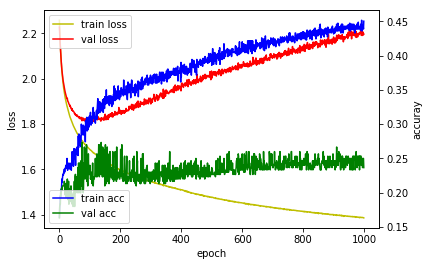

In [9]:
# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(custom_hist.train_loss, 'y', label='train loss')
loss_ax.plot(custom_hist.val_loss, 'r', label='val loss')

acc_ax.plot(custom_hist.train_acc, 'b', label='train acc')
acc_ax.plot(custom_hist.val_acc, 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

학습 모니터링 결과는 첫번째 예제와 유사하게 나온것을 확인 할 수 있다.<br>